In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ModelWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ModelWarning)
warnings.simplefilter('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

<AxesSubplot:xlabel='Month'>

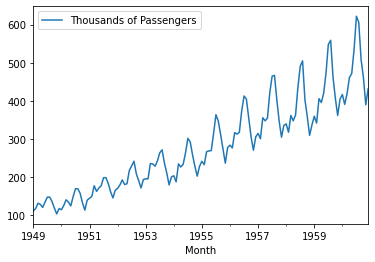

In [3]:
df = pd.read_csv('airline_passengers.csv', sep=',', index_col='Month', parse_dates=True)
df.plot()

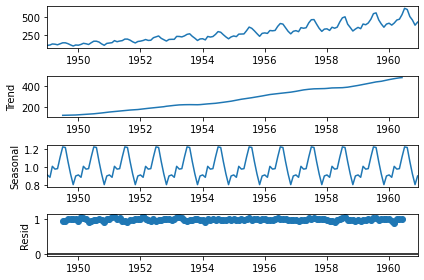

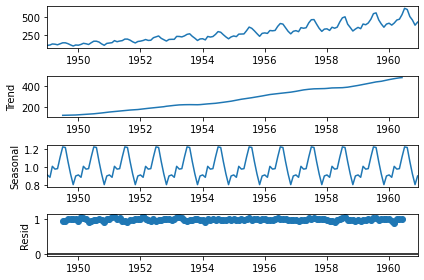

In [4]:
sDecomp = seasonal_decompose(df, model='mul')
sDecomp.plot()

In [5]:
auto_arima(df, seasonal = True, m = 12, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.48 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.15 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.50 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.07 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.17 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.39 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.40 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.91 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 12 Apr 2022   AIC                           1017.847
Time:                                     07:53:04   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3114     14.556      8.884      0.000     100.782     157.841
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
train = df.iloc[:-12]
test = df.iloc[-12:]
len(test)

12

# construct the model

In [7]:
model = SARIMAX(train, order = (2, 1, 1), seasonal_order=(0,1,0,12))
results = model.fit()
results

0.04431755007749067

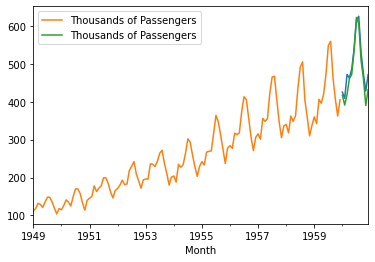

In [12]:
start = len(train)
end = start + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic=False, typ='levels').rename('SARIMA(2,1,1)(0,1,0,12)')
ax = predictions.plot()
train.plot(ax=ax)
test.plot(ax=ax)
mean_absolute_percentage_error(test, predictions)

## skipping typ

0.04431755007749067

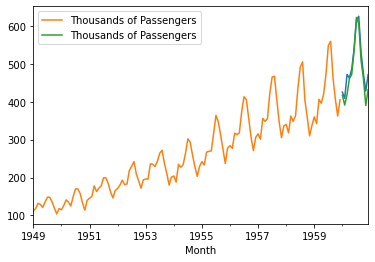

In [14]:
start = len(train)
end = start + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic=False).rename('SARIMA(2,1,1)(0,1,0,12)')
ax = predictions.plot()
train.plot(ax=ax)
test.plot(ax=ax)
mean_absolute_percentage_error(test, predictions)

# $CO_2$ data

In [46]:
df = pd.read_csv('co2_mm_mlo.csv', sep=',', parse_dates=True)
df['date'] = df.apply(lambda x : pd.to_datetime(str(int(x['year'])) + '-' + str(int(x['month']))), axis = 1)
df.drop(['year','month'], inplace=True, axis = 1)
df.set_index('date', inplace = True)
dfN = df['interpolated']
dfN

date
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
1958-07-01    315.86
               ...  
2018-07-01    408.71
2018-08-01    406.99
2018-09-01    405.51
2018-10-01    406.00
2018-11-01    408.02
Name: interpolated, Length: 729, dtype: float64

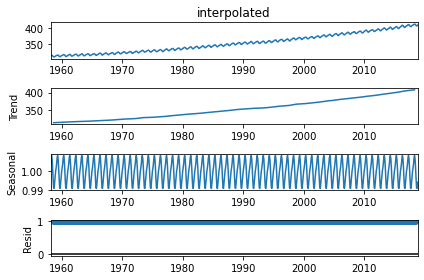

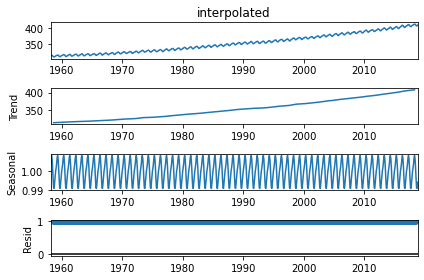

In [47]:
sDecomp = seasonal_decompose(dfN, model='mul')
sDecomp.plot()

In [50]:
auto_arima(dfN, seasonal = True, m = 1, trace = True).summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1440.918, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2369.532, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1880.794, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1935.623, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2375.248, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1715.503, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1440.128, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1785.006, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1684.115, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1441.136, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1608.681, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1442.505, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1532.865, Time=0.08 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 2.660 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  729
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -715.064
Date:                Tue, 12 Apr 2022   AIC                           1440.128
Time:                        08:15:40   BIC                           1463.079
Sample:                             0   HQIC                          1448.984
                                - 729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0395      0.003     11.810      0.000       0.033       0.046
ar.L1          1.5468      0.022     70.815      0.000       1.504       1.590
ar.L2         -0.8502      0.023    -36.917      0.000      -0.895      -0.805
ma.L1         -0.9012      0.018    -49.926      0.000      -0.937      -0.866
sigma2         0.4158      0.021     19.426      0.000       0.374       0.458
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                34.52
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.48
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
train = dfN.iloc[:-12]
test = dfN.iloc[-12:]
len(test)

12

In [55]:
model = SARIMAX(train, order = (2, 1, 1), seasonal_order=(0,0,0,12))
results = model.fit()
results

0.003790623958247233

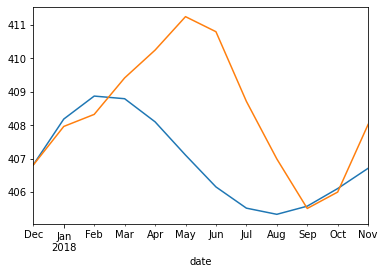

In [58]:
start = len(train)
end = start + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic=False, typ='levels').rename('SARIMA(2,1,1)(0,0,0,12)')
ax = predictions.plot()
#train.plot(ax=ax)
test.plot(ax=ax, name)
mean_absolute_percentage_error(test, predictions)

### predict into the future

In [ ]:
start = len(train)
end = start + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic=False, typ='levels').rename('SARIMA(2,1,1)(0,1,0,12)')
ax = predictions.plot()
train.plot(ax=ax)
test.plot(ax=ax)
mean_absolute_percentage_error(test, predictions)